### Install library

In [ ]:
# ! pip install matplotlib

### Import library

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### Define RNN class

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)

        # fully connected(hidden to output space)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, h_prev):
        # Update history of previous steps(hidden state)
        out, h_next = self.rnn(x, h_prev)

        # output in before layer to fully connected
        y = self.fc(out)
        return y, h_next

### Asyn value from model

In [ ]:
input_size = 3   # count of feature (Temperature, pressure, humidity)
hidden_size = 5  # count of hidden layer
output_size = 2  # count of output

### Create model from use

In [ ]:
rnn = SimpleRNN(input_size, hidden_size, output_size)

### Define input data

In [ ]:
x_sequence = torch.tensor([
    [[0.5, 0.2, 0.1],  # real-time data 1
     [0.6, 0.3, 0.2],  # real-time data 2
     [0.4, 0.1, 0.3],  # real-time data 3
     [0.7, 0.5, 0.4]]  # real-time data 4
], dtype=torch.float32)  # change type of data to float32

### Define first value from history data

In [ ]:
h_prev = torch.zeros(1, 1, hidden_size)

### Pass data from model

In [ ]:
output, h_next = rnn(x_sequence, h_prev)

### Showing output

In [ ]:
print("output RNN:")
print(output)

output RNN:
tensor([[[-0.1349, -0.5323],
         [-0.1804, -0.3870],
         [-0.1599, -0.4057],
         [-0.1263, -0.3641]]], grad_fn=<ViewBackward0>)


In [ ]:
import torch.nn.functional as F

probabilities = F.softmax(output, dim=-1)
print(probabilities)

tensor([[[0.5981, 0.4019],
         [0.5515, 0.4485],
         [0.5611, 0.4389],
         [0.5592, 0.4408]]], grad_fn=<SoftmaxBackward0>)


# Matplotlib

In [ ]:
output_np = output.detach().numpy()[0]
time_steps = range(1, len(output_np) + 1)

### Drawing from any feature output

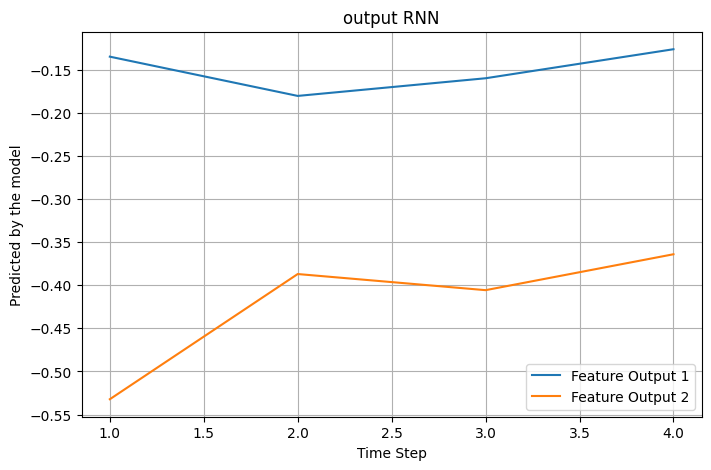

In [ ]:
plt.figure(figsize=(8, 5))
for i in range(output_size):
    plt.plot(time_steps, output_np[:, i], label=f'Feature Output {i + 1}')

plt.title("output RNN")
plt.xlabel("Time Step")
plt.ylabel("Predicted by the model")
plt.legend()
plt.grid(True)
plt.show()